In [ ]:
! pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c8a8211c0866773ed5f98e24e052005346f9e53c741d613774dc876fcbe95443
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
! pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
import nltk
import pandas as pd
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import scipy.cluster.hierarchy as sch
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import pyLDAvis
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from sklearn.manifold import TSNE
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# load the data 

In [ ]:
df = pd.read_csv("Q_A.csv")
df=df[:5000]
df

,Unnamed: 0,title,context,question,id,answers
0,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad..."
1,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta..."
2,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui..."
3,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla..."
4,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat..."
...,...,...,...,...,...,...
4995,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru..."
4996,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the..."
4997,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}"
4998,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}"


#Text pre-processing  


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
def clean_books(df):
  stemer=PorterStemmer()
  corpus = []
  for i in range(0,len(df)):
    # replace any character with space and leave the from (a - z )
    text = re.sub('[^A-Za-z]',' ',df['context'][i])
    text = text.lower()
    text = text.split()
    text = [stemer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)
  return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus = clean_books(df)

In [ ]:
df["clean_context"] = corpus
df.head()

,Unnamed: 0,title,context,question,id,answers,clean_context
0,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<FreqDist with 53 samples and 72 outcomes>
[('seminari', 4), ('moreau', 3)]


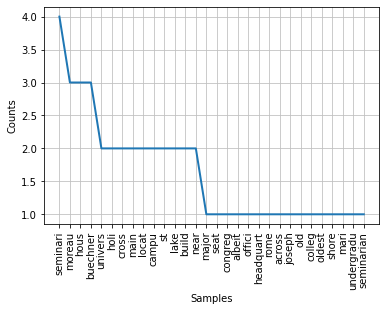

In [ ]:
nltk.download('punkt')

fdist = FreqDist(nltk.word_tokenize(df["clean_context"][10]))
print(fdist)
print(fdist.most_common(2))

fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
def worldcloud(df):
  comment_words = ''
  stopwords = set(STOPWORDS)
  
  # iterate through the csv file
  for val in df:
      
      # typecaste each val to string
      val = str(val)
  
      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

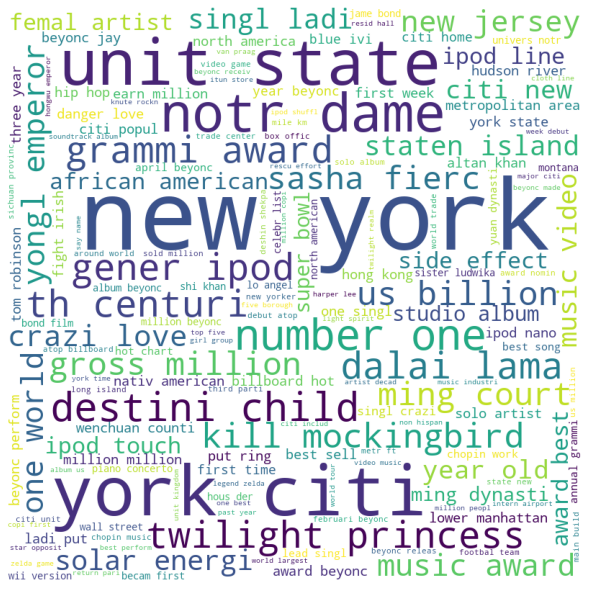

In [ ]:
worldcloud(df["clean_context"])

In [ ]:
X = df["clean_context"].values

#bow

In [ ]:
bow = CountVectorizer()
X_bow = bow.fit_transform(X).toarray()

In [ ]:
pd.DataFrame(X_bow,columns=bow.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aac,aaliyah,aaron,abandon,abbot,abbrevi,abc,abdomen,abduct,abel,...,zoo,zoologist,zora,zorn,zu,zuccotti,zuma,zuoren,zverev,zywni
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


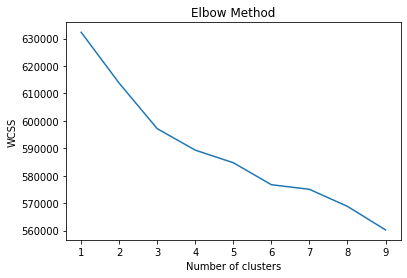

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_bow)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#K-means with pow

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)
pred_y = kmeans.fit_predict(X_bow)

##K-means with pow Clusters Visualization

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.029s...
[t-SNE] Computed neighbors for 5000 samples in 3.856s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 5.546960
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.336815
[t-SNE] KL divergence after 1000 iterations: -0.525415


[Text(0.5, 1.0, 'Kmean T-SNE projection')]

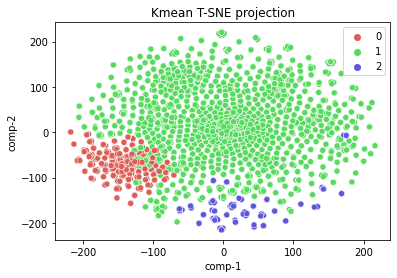

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=42)
z = tsne.fit_transform(X_bow)

tsne_df = pd.DataFrame()
tsne_df["y"] = pred_y
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="Kmean T-SNE projection") 

In [ ]:
pred_y_s = pd.Series(pred_y)

In [ ]:
pred_y_s

0       1
1       1
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Length: 5000, dtype: int32

In [ ]:
pred_y_s.value_counts()

1    4183
0     471
2     346
dtype: int64

In [ ]:
kmean_results = pd.DataFrame(pred_y_s, columns=['Cluster'])

kmean_results

,Cluster
0,1
1,1
2,1
3,1
4,1
...,...
4995,1
4996,1
4997,1
4998,1


In [ ]:
compined_data_bow_kmean = pd.concat([kmean_results, df],axis = 1)

compined_data_bow_kmean

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,1,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,1,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,1,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,1,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,1,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,1,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,1,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,1,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,1,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


#K-means with pow error analysis Draw word cloud for mistakes word 

# K-means with pow silhouette score

In [ ]:
silhouette_score_bow_kmean=silhouette_score(X_bow,pred_y)
print(silhouette_score_bow_kmean)

0.10530761233249189


In [ ]:
tokenizer = lambda s: re.findall( '\w+', s.lower() )
texts = [ tokenizer(t) for t in  X ]

# Creating some random topics
topics = [['day','time','see','mother'],
          ['good','come','make','say']
           ]

# Creating a dictionary with the vocabulary
word2id = Dictionary( texts )

# Coherence model
cm = CoherenceModel(model =kmeans, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence = cm.get_coherence()  # get coherence value
print(coherence)

<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<input>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-42-4617f02bf087>:1: DeprecationWarning: invalid escape sequence \w
  tokenizer = lambda s: re.findall( '\w+', s.lower() )


0.5632134986838622


In [ ]:
cm = CoherenceModel(model =kmeans, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_kmean_bow = cm.get_coherence()  # get coherence value
print(coherence_kmean_bow)

0.5632134986838622


{'color_list': ['C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  

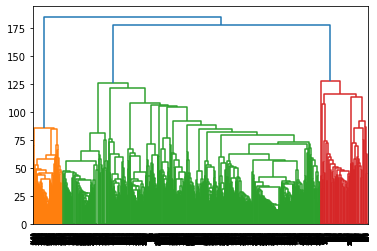

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_bow, method='ward'))
dendrogram

# *AgglomerativeClustering with pow*

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_bow)

In [ ]:
y_hc

array([2, 2, 2, ..., 2, 2, 2])

## AgglomerativeClustering with pow Clusters Visualization

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.031s...
[t-SNE] Computed neighbors for 5000 samples in 3.947s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 5.546960
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.336815
[t-SNE] KL divergence after 1000 iterations: -0.525415


[Text(0.5, 1.0, 'Agglomerative T-SNE projection')]

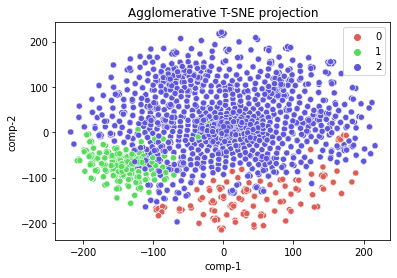

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=42)
z = tsne.fit_transform(X_bow)

tsne_df = pd.DataFrame()
tsne_df["y"] = y_hc
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="Agglomerative T-SNE projection") 

In [ ]:
agglomerative_clustering_result = pd.DataFrame(y_hc, columns=['Cluster_agglomerative'])

agglomerative_clustering_result

,Cluster_agglomerative
0,2
1,2
2,2
3,2
4,2
...,...
4995,2
4996,2
4997,2
4998,2


In [ ]:
compined_data_agg_bow = pd.concat([agglomerative_clustering_result, df],axis = 1)

compined_data_agg_bow

,Cluster_agglomerative,Unnamed: 0,title,context,question,id,answers,clean_context
0,2,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,2,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,2,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,2,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,2,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,2,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,2,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,2,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,2,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


## AgglomerativeClustering with pow  error analysis Draw word cloud for mistakes words

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score_hc_bow =silhouette_score(X_bow, y_hc)
print(silhouette_score_hc_bow)

0.08737506799310384


In [ ]:
cm_h = CoherenceModel(model =hc, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_h = cm_h.get_coherence()  # get coherence value
print(coherence_h)

0.5632134986838622


# GaussianMixture with bow

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_bow)
labels = gmm.predict(X_bow)

## GaussianMixture with bow Clusters Vistualization





/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.030s...
[t-SNE] Computed neighbors for 5000 samples in 3.905s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 5.546960
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.008659
[t-SNE] KL divergence after 1000 iterations: -0.570646


[Text(0.5, 1.0, 'Gaussian Mixture T-SNE projection')]

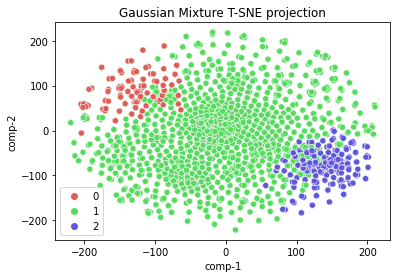

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_bow)

tsne_df = pd.DataFrame()
tsne_df["y"] = labels
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="Gaussian Mixture T-SNE projection") 

In [ ]:
labels_G = pd.Series(labels)
labels_G

0       1
1       1
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Length: 5000, dtype: int64

In [ ]:
labels_G.value_counts()

1    4033
2     491
0     476
dtype: int64

In [ ]:
gmm_results = pd.DataFrame(labels_G, columns=['Cluster'])

gmm_results

,Cluster
0,1
1,1
2,1
3,1
4,1
...,...
4995,1
4996,1
4997,1
4998,1


In [ ]:
compined_data_gm_bow = pd.concat([gmm_results, df],axis = 1)

compined_data_gm_bow

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,1,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,1,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,1,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,1,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,1,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,1,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,1,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,1,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,1,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


# GaussianMixture with bow silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score_gm_bow=silhouette_score(X_bow,labels)
print(silhouette_score_gm_bow)

-0.0025406249613993672


# coherence score for GaussianMixture with pow 

In [ ]:
cm_em = CoherenceModel(model =gmm, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_em = cm_em.get_coherence()  # get coherence value
print(coherence_em)

0.5632134986838622


# word to vec





In [ ]:
id2word = Dictionary(texts)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Lda Model 

In [ ]:
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=3, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

print(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0, '0.015*"solar" + 0.012*"use" + 0.009*"water" + 0.007*"heat" + 0.007*"system" + 0.007*"citi" + 0.006*"energi" + 0.006*"plant" + 0.005*"scout" + 0.005*"atticu"'), (1, '0.047*"york" + 0.046*"new" + 0.046*"citi" + 0.010*"unit" + 0.009*"million" + 0.008*"manhattan" + 0.008*"first" + 0.007*"world" + 0.007*"one" + 0.007*"use"'), (2, '0.012*"state" + 0.011*"book" + 0.010*"area" + 0.009*"kill" + 0.008*"lee" + 0.008*"solar" + 0.008*"year" + 0.007*"also" + 0.007*"largest" + 0.006*"build"')]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.2569889835439347


In [ ]:
pyLDAvis.enable_notebook()
p = gensimvis.prepare(lda_model, corpus, id2word)
p

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.169848 -0.019949       1        1  40.510723
2     -0.109683 -0.092664       2        1  31.270678
0     -0.060165  0.112613       3        1  28.218598, topic_info=             Term         Freq        Total Category  logprob  loglift
806          york  6875.000000  6875.000000  Default  30.0000  30.0000
775          citi  7425.000000  7425.000000  Default  29.0000  29.0000
505           new  7689.000000  7689.000000  Default  28.0000  28.0000
485          area  1136.000000  1136.000000  Default  27.0000  27.0000
307          book  1385.000000  1385.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
7852  mockingbird   366.136241  1129.382804   Topic3  -5.6238   0.1388
505           new   458.392591  7689.722153   Topic3  -5.3991  -1.5547
346        nation   313.498210  1234.561891   Topic3  -5.7790  -0.1055
97            one   328.023425  1802.923854   Topic3  -5.7337  -0.4389
235          time   304.223697   973.383227   Topic3  -5.8091   0.1022

[232 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
358       1  0.061690   accord
358       2  0.925354   accord
358       3  0.011567   accord
1540      1  0.986019  actress
1540      2  0.017299  actress
...     ...       ...      ...
132       2  0.625057     year
132       3  0.126165     year
806       1  0.989945     york
806       2  0.000727     york
806       3  0.009309     york

[527 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

#  Apply the last same steps but with less feature

In [ ]:
bow= CountVectorizer(max_features= 2000)
X_bow_2000 = bow.fit_transform(X).toarray()

In [ ]:
pd.DataFrame(X_bow_2000,columns=bow.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aac,abandon,abil,abl,absorb,academ,academi,accept,access,accessori,...,yongl,york,yorker,young,yuan,ywni,zahm,zant,zelda,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


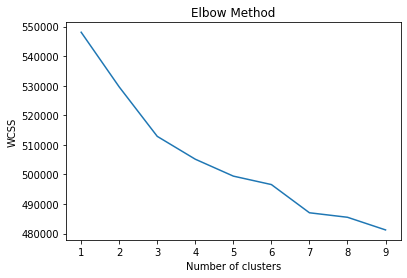

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_bow_2000)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-means with pow 2000 features

In [ ]:
kmeans_2000 = KMeans(n_clusters=3, init='k-means++',random_state=0)
pred_y_2000 = kmeans_2000.fit_predict(X_bow_2000)

## ClustersK-means with pow 2000 Clusters Visualization Visualization

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 1.725s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 4.945758
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.736183
[t-SNE] KL divergence after 1000 iterations: -0.510191


[Text(0.5, 1.0, 'kmeans 2000 T-SNE projection')]

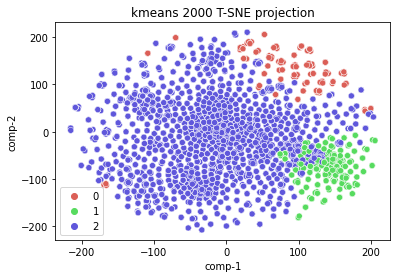

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_bow_2000)

tsne_df = pd.DataFrame()
tsne_df["y"] = pred_y_2000
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="kmeans 2000 T-SNE projection") 

In [ ]:
kmeans_2000_results = pd.DataFrame(pred_y_2000, columns=['Cluster'])

kmeans_2000_results

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
4995,2
4996,2
4997,2
4998,2


In [ ]:
compined_data_kmean_2000 = pd.concat([kmeans_2000_results, df],axis = 1)

compined_data_kmean_2000

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,2,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,2,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,2,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,2,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,2,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,2,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,2,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,2,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,2,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


# K-means with pow 2000 silhouette score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score_kmean_2000=silhouette_score(X_bow_2000,pred_y_2000)
print(silhouette_score_kmean_2000)

0.12911411050392638


# K-means with pow 2000 coherence score

In [ ]:
cm = CoherenceModel(model =kmeans_2000, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence = cm.get_coherence()  # get coherence value
print(coherence)

0.5632134986838622


{'color_list': ['C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  

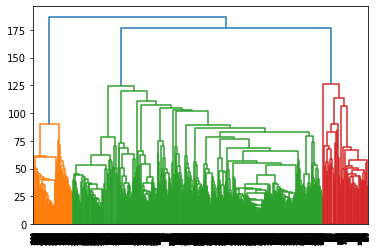

In [ ]:
dendrogram_2000 = sch.dendrogram(sch.linkage(X_bow_2000, method='ward'))
dendrogram_2000

# AgglomerativeClustering with pow 2000

In [ ]:
hc_2000 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc_2000 = hc_2000.fit_predict(X_bow_2000)

## AgglomerativeClustering with pow 2000 Clusters Visualization

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.008s...
[t-SNE] Computed neighbors for 5000 samples in 1.130s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 4.945758
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.736183
[t-SNE] KL divergence after 1000 iterations: -0.510191


[Text(0.5, 1.0, 'Agglomerative 2000 T-SNE projection')]

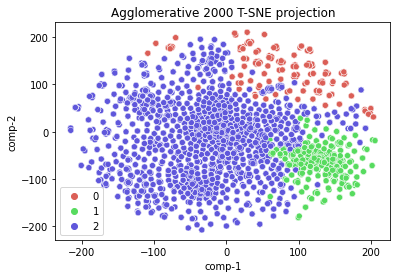

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_bow_2000)

tsne_df = pd.DataFrame()
tsne_df["y"] = y_hc_2000
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="Agglomerative 2000 T-SNE projection") 

In [ ]:
agglomerative_clustering_2000_results = pd.DataFrame(y_hc_2000, columns=['Cluster'])

agglomerative_clustering_2000_results

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
4995,2
4996,2
4997,2
4998,2


In [ ]:
compined_data_agg_2000 = pd.concat([agglomerative_clustering_2000_results, df],axis = 1)

compined_data_agg_2000

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,2,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,2,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,2,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,2,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,2,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,2,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,2,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,2,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,2,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


# AgglomerativeClustering with pow 2000 silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score_agg_2000=silhouette_score(X_bow_2000,y_hc_2000)
print(silhouette_score_agg_2000)

0.07717509998982704


#  AgglomerativeClustering with pow 2000 coherence_score

In [ ]:
cm_h = CoherenceModel(model =hc_2000, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_h = cm_h.get_coherence()  # get coherence value
print(coherence_h)

0.5632134986838622


# GaussianMixture with pow 2000 

In [ ]:
gmm_2000 = GaussianMixture(n_components=3)
gmm_2000.fit(X_bow_2000)
labels_2000 = gmm_2000.predict(X_bow_2000)

## GaussianMixture with pow 2000 Clusters Vistualization

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.008s...
[t-SNE] Computed neighbors for 5000 samples in 1.461s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 4.945758
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.736183
[t-SNE] KL divergence after 1000 iterations: -0.510191


[Text(0.5, 1.0, 'Gaussian Mixture 2000 T-SNE projection')]

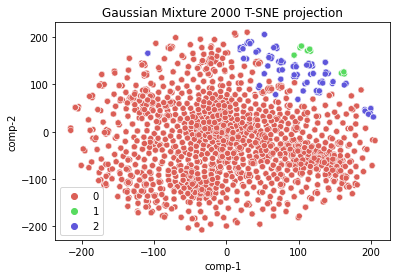

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_bow_2000)

tsne_df = pd.DataFrame()
tsne_df["y"] = labels_2000
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="Gaussian Mixture 2000 T-SNE projection") 

In [ ]:
gmm_2000_results = pd.DataFrame(labels_2000, columns=['Cluster'])

gmm_2000_results

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [ ]:
compined_data_gm_2000 = pd.concat([gmm_2000_results, df],axis = 1)

compined_data_gm_2000

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,0,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,0,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,0,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,0,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,0,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,0,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,0,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,0,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,0,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score_gm_2000=silhouette_score(X_bow_2000,labels_2000)
print(silhouette_score_gm_2000)

0.16078049439336548


# GaussianMixture with pow 2000 coherence score

In [ ]:
cm_em = CoherenceModel(model =gmm_2000, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_em = cm_em.get_coherence()  # get coherence value
print(coherence_em)

0.5632134986838622


# Apply TF-IDF

In [ ]:
tf = TfidfVectorizer()
X_tf=tf.fit_transform(X).toarray()

In [ ]:
pd.DataFrame(X_tf,columns=tf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aac,aaliyah,aaron,abandon,abbot,abbrevi,abc,abdomen,abduct,abel,...,zoo,zoologist,zora,zorn,zu,zuccotti,zuma,zuoren,zverev,zywni
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


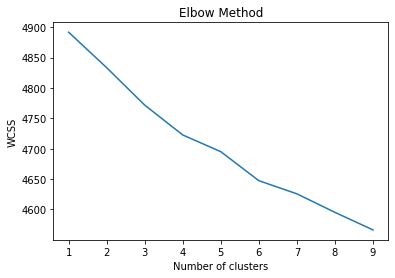

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_tf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# k-means with Tf Idf 

In [ ]:
kmeans_tf = KMeans(n_clusters=3, init='k-means++',random_state=0)
pred_y_tf = kmeans_tf.fit_predict(X_tf)

##  k-means with Tf Idf Clusters Visualization

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.028s...
[t-SNE] Computed neighbors for 5000 samples in 4.483s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.686085
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.107986
[t-SNE] KL divergence after 1000 iterations: 0.052933


[Text(0.5, 1.0, 'kmeans TF T-SNE projection')]

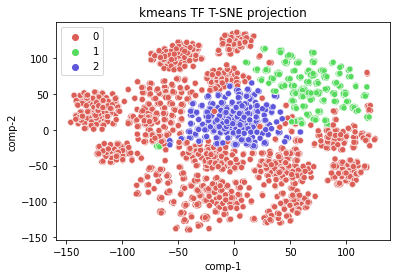

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=42)
z = tsne.fit_transform(X_tf)

tsne_df = pd.DataFrame()
tsne_df["y"] = pred_y_tf
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="kmeans TF T-SNE projection") 

In [ ]:
kmean_results_tf = pd.DataFrame(pred_y_tf, columns=['Cluster'])

kmean_results_tf

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [ ]:
compined_data_kmean_tf = pd.concat([kmean_results_tf, df],axis = 1)

compined_data_kmean_tf

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,0,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,0,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,0,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,0,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,0,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,0,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,0,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,0,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,0,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


## k-means with Tf-Idf silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score_kmean_tf=silhouette_score(X_tf,pred_y_tf)
print(silhouette_score_kmean_tf)

0.015994630853594243


## k-means with Tf-Idf coherence_score

In [ ]:
cm = CoherenceModel(model = kmeans_tf, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence = cm.get_coherence() 
print(coherence)

0.5632134986838622


{'color_list': ['C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  

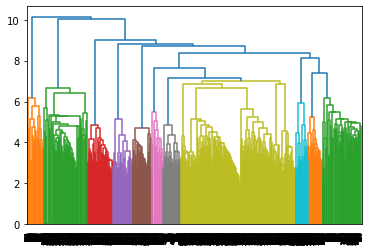

In [ ]:
dendrogram_tf = sch.dendrogram(sch.linkage(X_tf, method='ward'))
dendrogram_tf

## AgglomerativeClustering with Tf-Idf

In [ ]:
hc_tf = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc_tf = hc_tf.fit_predict(X_tf)

## AgglomerativeClustering with Tf-Idf Clusters Visualization

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.028s...
[t-SNE] Computed neighbors for 5000 samples in 3.261s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.686085
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.042755
[t-SNE] KL divergence after 1000 iterations: 0.080017


[Text(0.5, 1.0, 'Agglomerative TF T-SNE projection')]

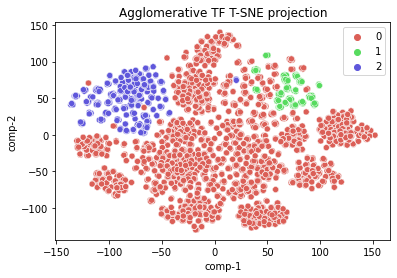

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_tf)

tsne_df = pd.DataFrame()
tsne_df["y"] = y_hc_tf
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="Agglomerative TF T-SNE projection") 

In [ ]:
agg_cluster_tf_results = pd.DataFrame(y_hc_tf, columns=['Cluster'])

agg_cluster_tf_results

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [ ]:
compined_data_agg_tf = pd.concat([agg_cluster_tf_results, df],axis = 1)

compined_data_agg_tf

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,0,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,0,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,0,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,0,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,0,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,0,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,0,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,0,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,0,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


## AgglomerativeClustering with Tf-Idf silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score_agg_tf=silhouette_score(X_tf,y_hc_tf)
print(silhouette_score_agg_tf)

0.010759753564862572


## AgglomerativeClustering with Tf-Idf coherence score


In [ ]:
cm_h = CoherenceModel(model =hc_tf, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_h = cm_h.get_coherence()  # get coherence value
print(coherence_h)

0.5632134986838622


## GaussianMixture with Tf-Idf 

In [ ]:
X_tf_pca=PCA(n_components=700)
x=X_tf_pca.fit_transform(X_tf)

In [ ]:
gmm_tf = GaussianMixture(n_components=3)
gmm_tf.fit(x)
labels_tf = gmm_tf.predict(x)

## Clusters Visualization for GaussianMixture with Tf-Idf 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.046s...
[t-SNE] Computed neighbors for 5000 samples in 6.116s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 5.546960
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.008659
[t-SNE] KL divergence after 1000 iterations: -0.570646


[Text(0.5, 1.0, 'GaussianMixture TF T-SNE projection')]

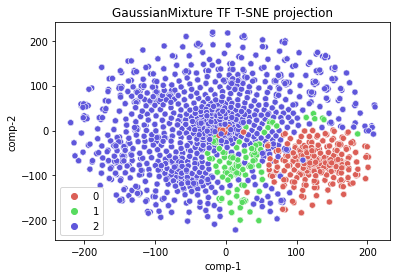

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_bow)

tsne_df = pd.DataFrame()
tsne_df["y"] = labels_tf
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="GaussianMixture TF T-SNE projection") 

In [ ]:
gmm_results_tf = pd.DataFrame(labels_tf, columns=['Cluster'])

gmm_results_tf

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
4995,2
4996,2
4997,2
4998,2


In [ ]:
compined_data_gmm_tf = pd.concat([gmm_results_tf, df],axis = 1)

compined_data_gmm_tf

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,2,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,2,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,2,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,2,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,2,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,2,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,2,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,2,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,2,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


## GaussianMixture with Tf-Idf silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score_gm_tf=silhouette_score(X_tf,labels_tf)
print(silhouette_score_gm_tf)

0.013475419112979916


## GaussianMixture with Tf-Idf coherence score

In [ ]:
cm_em = CoherenceModel(model =gmm_tf, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_em = cm_em.get_coherence()  # get coherence value
print(coherence_em)

0.5632134986838622


# Apply tf idf with bigram

In [ ]:
tf = TfidfVectorizer(ngram_range=(2,2))
X_tf_bi=tf.fit_transform(X).toarray()

In [ ]:
pd.DataFrame(X_tf_bi,columns=tf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aac aiff,aac audio,aac file,aac format,aac protect,aaliyah princ,aaron call,abandon current,abandon drepung,abandon listen,...,zoologist felik,zora lanayru,zorn chicago,zu sayn,zuccotti park,zuma addit,zuma urg,zuoren attempt,zverev drill,zywni elsner
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


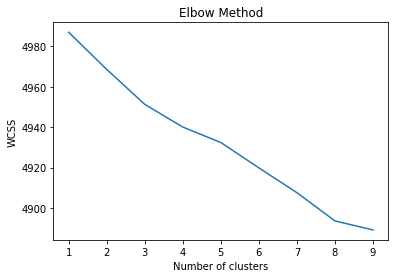

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_tf_bi)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## k-means with TF-IDF bigram

In [ ]:
kmeans_tf_bi = KMeans(n_clusters=3, init='k-means++',random_state=0)
pred_y_tf_bi = kmeans_tf_bi.fit_predict(X_tf)

## Clusters Visualization for k-means with TF-IDF bigram

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.152s...
[t-SNE] Computed neighbors for 5000 samples in 17.325s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.718859
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.245445
[t-SNE] KL divergence after 1000 iterations: 0.137929


[Text(0.5, 1.0, 'kmeans TF-BI T-SNE projection')]

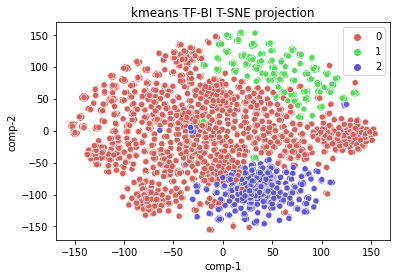

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_tf_bi)

tsne_df = pd.DataFrame()
tsne_df["y"] = pred_y_tf_bi
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="kmeans TF-BI T-SNE projection") 

In [ ]:
pd.Series(pred_y_tf_bi).value_counts()

0    3506
2     767
1     727
dtype: int64

In [ ]:
kmean_results_tf_bi = pd.DataFrame(pred_y_tf_bi, columns=['Cluster'])

kmean_results_tf_bi

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [ ]:
compined_data_kmean_tf_bi = pd.concat([kmean_results_tf_bi, df],axis = 1)

compined_data_kmean_tf_bi

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,0,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,0,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,0,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,0,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,0,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,0,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,0,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,0,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,0,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


## k-means with TF-IDF bigram silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score_kmean_tf_bi=silhouette_score(X_tf_bi,pred_y_tf_bi)

print(silhouette_score_kmean_tf_bi)

0.006352911787470551


## k-means with TF-IDF bigram coherence score

In [ ]:
cm = CoherenceModel(model = kmeans_tf_bi, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence = cm.get_coherence() 
print(coherence)

0.5632134986838622


{'color_list': ['C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C1',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C2',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  'C3',
  

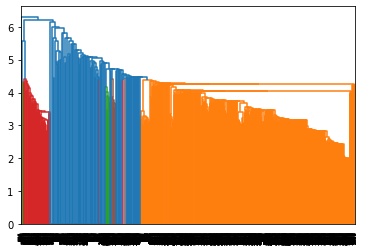

In [ ]:
dendrogram_tf_bi = sch.dendrogram(sch.linkage(X_tf_bi, method='ward'))
dendrogram_tf_bi

## AgglomerativeClustering with TF_IDF bigram

In [ ]:
hc_tf_bi = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc_tf_bi = hc_tf_bi.fit_predict(X_tf)

## Clusters Visualization for AgglomerativeClustering with TF_IDF bigram

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.154s...
[t-SNE] Computed neighbors for 5000 samples in 16.509s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.718859
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.245438
[t-SNE] KL divergence after 1000 iterations: 0.137929


[Text(0.5, 1.0, 'Agglomerative TF-BI T-SNE projection')]

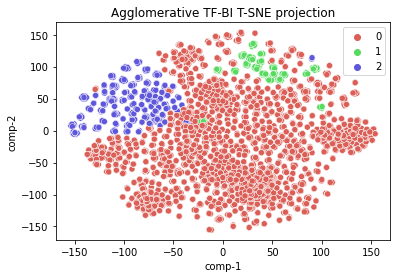

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_tf_bi)

tsne_df = pd.DataFrame()
tsne_df["y"] = y_hc_tf_bi
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="Agglomerative TF-BI T-SNE projection") 

In [ ]:
agg_cluster_tf_bi_results = pd.DataFrame(y_hc_tf_bi, columns=['Cluster'])

agg_cluster_tf_bi_results

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [ ]:
compined_data_agg_tf_bi = pd.concat([agg_cluster_tf_bi_results, df],axis = 1)

compined_data_agg_tf_bi

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,0,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,0,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,0,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,0,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,0,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,0,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,0,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,0,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,0,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


##  AgglomerativeClustering with TF_IDF bigram silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score_agg_tf_bi=silhouette_score(X_tf_bi,y_hc_tf_bi)
print(silhouette_score_agg_tf_bi)

0.006400279131565316


##  AgglomerativeClustering with TF_IDF bigram coherence score

In [ ]:
cm_h = CoherenceModel(model =hc_tf_bi, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_h = cm_h.get_coherence()  # get coherence value
print(coherence_h)

0.5632134986838622


 # Apply tf idf with bigram with PCA
 ###  tf idf with bigram need high computing power so we use PCA to reduce data dimensions 

In [ ]:
X_tf_bi_pca=PCA(n_components=700)
x=X_tf_bi_pca.fit_transform(X_tf_bi)

In [ ]:
gmm_tf_bi = GaussianMixture(n_components=3)
gmm_tf_bi.fit(x)
labels_tf_bi = gmm_tf_bi.predict(x)

\## Clusters Visualization for GaussianMixture with Tf-Idf bigram 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.153s...
[t-SNE] Computed neighbors for 5000 samples in 19.673s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.718859
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.245438
[t-SNE] KL divergence after 1000 iterations: 0.137929


[Text(0.5, 1.0, 'gmm  TF-BI T-SNE projection')]

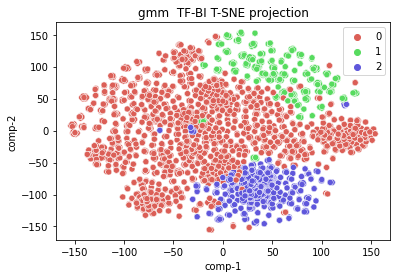

In [ ]:
# Clusters Visualization
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_tf_bi)

tsne_df = pd.DataFrame()
tsne_df["y"] = pred_y_tf_bi
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=tsne_df).set(title="gmm  TF-BI T-SNE projection") 

In [ ]:
gmm_results_tf = pd.DataFrame(labels_tf, columns=['Cluster'])

gmm_results_tf

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
4995,2
4996,2
4997,2
4998,2


In [ ]:
compined_data_gmm_tf_pca = pd.concat([gmm_results_tf, df],axis = 1)

compined_data_gmm_tf_pca

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,2,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,2,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,2,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,2,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,2,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,2,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,2,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,2,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,2,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...


## GaussianMixture with Tf-Idf bigram  silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score_gmm_tf_bi_pca=silhouette_score(X_tf_bi,labels_tf_bi)
print(silhouette_score_gmm_tf_bi_pca)

0.0054987756587394744


## GaussianMixture with Tf-Idf bigram coherence score

In [ ]:
cm_em = CoherenceModel(model =gmm_tf_bi, topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_em = cm_em.get_coherence()  # get coherence value
print(coherence_em)

0.5632134986838622


In [ ]:
overall_performance = { 
    "kmeans_pow" : silhouette_score_bow_kmean,
    "AgglomerativeClustering_pow" : silhouette_score_hc_bow,
    "GaussianMixture_pow" :silhouette_score_gm_bow,
    "kmeans_pow_2000" : silhouette_score_kmean_2000,
    "AgglomerativeClustering_pow_2000" : silhouette_score_agg_2000,
    "GaussianMixture_pow_2000" : silhouette_score_gm_2000,
    "kmeans_tf" : silhouette_score_kmean_tf,
    "AgglomerativeClustering_tf" : silhouette_score_agg_tf,
    "GaussianMixture_tf" : silhouette_score_gm_tf,
    "kmeans_tf_bi" : silhouette_score_kmean_tf_bi,
    "AgglomerativeClustering_tf_bi" : silhouette_score_agg_tf_bi,
    "GaussianMixture_tf_bi_pca" : silhouette_score_gmm_tf_bi_pca
}

overall_performance=pd.DataFrame.from_dict(overall_performance, orient='index', columns=['silhouette_score'])

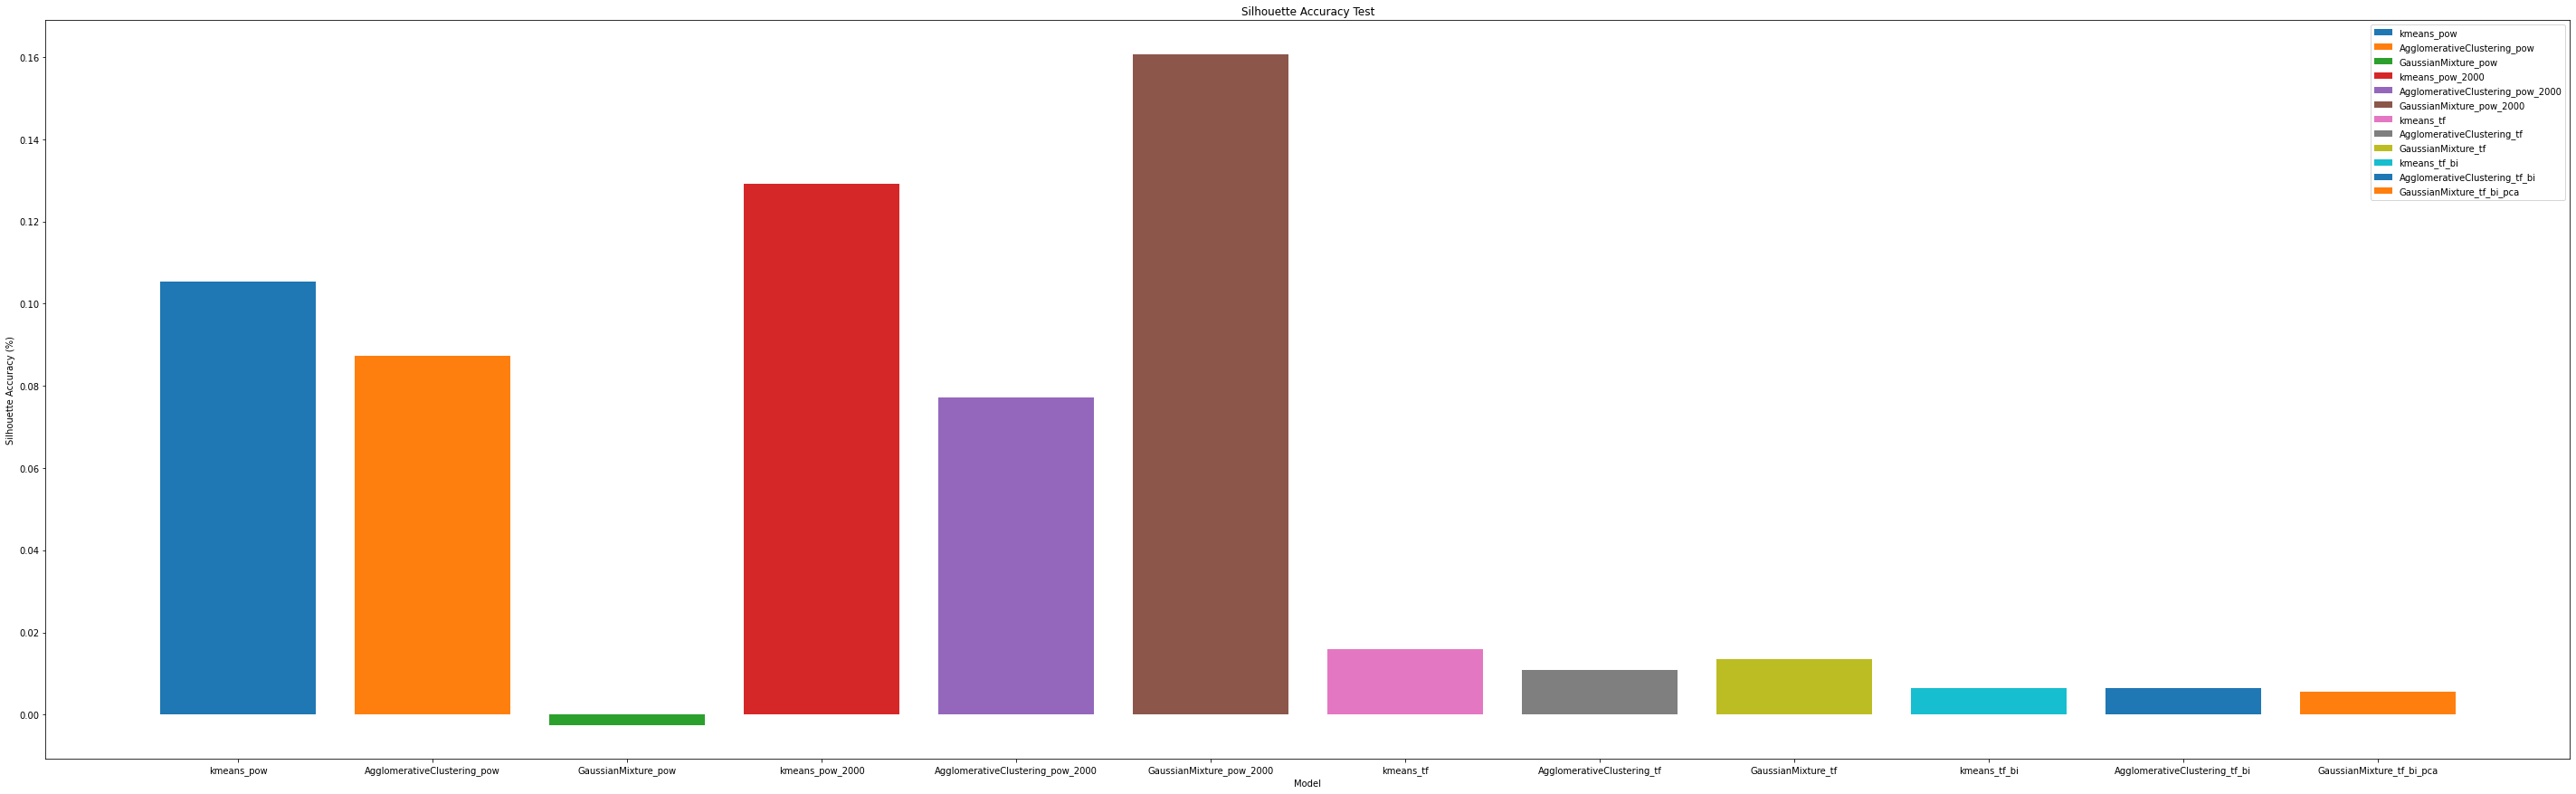

In [ ]:
plt.figure(figsize=(50,15))
plt.bar('kmeans_pow', silhouette_score_bow_kmean, label='kmeans_pow')
plt.bar(['AgglomerativeClustering_pow'], silhouette_score_hc_bow, label='AgglomerativeClustering_pow')
plt.bar('GaussianMixture_pow', silhouette_score_gm_bow, label='GaussianMixture_pow')
plt.bar(['kmeans_pow_2000'], silhouette_score_kmean_2000, label='kmeans_pow_2000')
plt.bar('AgglomerativeClustering_pow_2000', silhouette_score_agg_2000, label='AgglomerativeClustering_pow_2000')
plt.bar(['GaussianMixture_pow_2000'], silhouette_score_gm_2000, label='GaussianMixture_pow_2000')
plt.bar(['kmeans_tf'], silhouette_score_kmean_tf, label='kmeans_tf')
plt.bar(['AgglomerativeClustering_tf'], silhouette_score_agg_tf, label='AgglomerativeClustering_tf')
plt.bar(['GaussianMixture_tf'], silhouette_score_gm_tf, label='GaussianMixture_tf')
plt.bar(['kmeans_tf_bi'], silhouette_score_kmean_tf_bi, label='kmeans_tf_bi')
plt.bar(['AgglomerativeClustering_tf_bi'], silhouette_score_agg_tf_bi, label='AgglomerativeClustering_tf_bi')
plt.bar(['GaussianMixture_tf_bi_pca'], silhouette_score_gmm_tf_bi_pca, label='GaussianMixture_tf_bi_pca')

plt.title('Silhouette Accuracy Test')
plt.xlabel('Model')
plt.ylabel('Silhouette Accuracy (%)')
plt.legend()
plt.show()

In [ ]:
compined_data_gm_2000.to_csv('Q_A_label.csv', index = False, encoding='utf-8')

In [ ]:
pd.read_csv('/content/Q_A_label.csv')

,Cluster,Unnamed: 0,title,context,question,id,answers,clean_context
0,0,0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,"{'answer_start': [515], 'text': ['Saint Bernad...",architectur school cathol charact atop main bu...
1,0,1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,"{'answer_start': [188], 'text': ['a copper sta...",architectur school cathol charact atop main bu...
2,0,2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,"{'answer_start': [279], 'text': ['the Main Bui...",architectur school cathol charact atop main bu...
3,0,3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,5733be284776f41900661181,"{'answer_start': [381], 'text': ['a Marian pla...",architectur school cathol charact atop main bu...
4,0,4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,5733be284776f4190066117e,"{'answer_start': [92], 'text': ['a golden stat...",architectur school cathol charact atop main bu...
...,...,...,...,...,...,...,...,...
4995,0,4995,Solar_energy,Agriculture and horticulture seek to optimize ...,What did French and English farmers do during ...,56d086c9234ae51400d9c342,"{'answer_start': [497], 'text': ['employed fru...",agricultur horticultur seek optim captur solar...
4996,0,4996,Solar_energy,Agriculture and horticulture seek to optimize ...,What was the purpose of the fruit walls built ...,56d086c9234ae51400d9c343,"{'answer_start': [574], 'text': ['acted as the...",agricultur horticultur seek optim captur solar...
4997,0,4997,Solar_energy,"Greenhouses convert solar light to heat, enabl...",When were the first greenhouses used?,56ce7376aab44d1400b887a7,"{'answer_start': [238], 'text': ['Roman times']}",greenhous convert solar light heat enabl year ...
4998,0,4998,Solar_energy,"Greenhouses convert solar light to heat, enabl...",In what century were the first modern greenhou...,56ce7376aab44d1400b887a8,"{'answer_start': [367], 'text': ['the 16th']}",greenhous convert solar light heat enabl year ...
